In [197]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

import seaborn as sns

sns.set()

%config InlineBackend.figure_format = 'svg'

In [198]:
df = pd.read_csv("video_games_sales.csv")

In [199]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

### Filling NaN  values

In [201]:
mean_year = np.mean(df["Year_of_Release"])
med_year = df['Year_of_Release'].median()
df['Year_of_Release'] = df['Year_of_Release'].fillna(med_year)
print(f'''Mean Year_of_Release {mean_year}''')
print(f'''Median Year_of_Release {med_year}''')

Mean Year_of_Release 2006.4873556231003
Median Year_of_Release 2007.0


In [202]:
mean_Critic_Score = df['Critic_Score'].mean()
df['Critic_Score'] = df['Critic_Score'].fillna(mean_Critic_Score)
print(f'''Critic_Score {mean_Critic_Score}''')

Critic_Score 68.96767850559173


In [203]:
mean_Critic_Count = df['Critic_Count'].mean()
df['Critic_Count'] = df['Critic_Count'].fillna(mean_Critic_Count)
print(f'''Critic_Count {mean_Critic_Count}''')

Critic_Count 26.360820941378886


In [204]:
mean_User_Count = df['User_Count'].mean()
df['User_Count'] = df['User_Count'].fillna(mean_User_Count)
print(f'''User_Count {mean_User_Count}''')

User_Count 162.22990777338603


In [205]:
cnt = 0
numb = 0
for i in df["User_Score"]:
    if(i != "tbd" and float(i) > 0.0):
        cnt += float(i)
        numb += 1

mean_User_Score = cnt / numb
print(mean_User_Score)
df["User_Score"] = df["User_Score"].replace("tbd", mean_User_Score)
df['User_Score'] = df['User_Score'].fillna(mean_User_Score)


7.125984978258054


In [206]:
df["User_Score"] = list(map(float, df["User_Score"]))

In [207]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,7.125985,162.229908,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,7.125985,162.229908,NaN,NaN


### heatmap

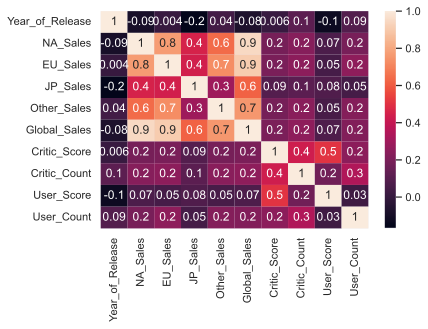

In [208]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, fmt='.1g');

In [209]:
# x = df["User_Score"]
# y = df["Global_Sales"]

# sns.barplot(x=x, y=y);

### Dependency analysis

In [210]:
sns.relplot(data=df,
            x='Global_Sales',
            y='Critic_Score',
            );

### The highest rating

In [211]:
import csv
max_result = max(df["User_Score"]);

with open("video_games_sales.csv",  encoding="utf8") as f:
    reader = csv.DictReader(f, delimiter=",")

    for row in reader:
        if(row["User_Score"] != '' and row["User_Score"] != "tbd" and float(row["User_Score"]) == max_result):
            print(row["Name"])
        

Breath of Fire III
